### Financial Sentiment Analysis

import libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install nltk

In [3]:
# library to clean data
import re
# Natural Language Tool Kit
import nltk
nltk.download('stopwords')
# to remove stopword
from nltk.corpus import stopwords
# for Stemming propose
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

### Data Collection and Analyze

In [5]:
#expanding the display of text column
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows',None)

In [9]:
data=[i.rstrip() for i in open('C:\\Users\\Dell\\Desktop\\Sentimental Analysis\\data\\FinancialData.csv',encoding = "ISO-8859-1")]
data

['neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."',
 'neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."',
 'negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."',
 'positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .',
 'positive,"According to the company \'s updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin o

In [10]:
#length of our data
len(data)

4846

In [11]:
for num, info in enumerate(data[:20]):
    print(num,info)

0 neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
1 neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
2 negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
3 positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
4 positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -2

In [14]:
Financial_data_set = pd.read_csv("C:\\Users\\Dell\\Desktop\\Sentimental Analysis\\data\\FinancialData.csv", encoding = "ISO-8859-1",header=None)
Financial_data_set.shape
#names=['label','review'] #encoding='latin-1'or"ISO-8859-1"or'utf-8'#tsv file-delimiter/separator'\t'

(4846, 2)

In [15]:
data_set=Financial_data_set.copy()
data_set.head()

,0,1
0,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
1,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
2,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
3,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
4,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."


In [16]:
column_names=['label','review']

In [17]:
data_set.columns = column_names  #ignore_index=True
data_set.head()

,label,review
0,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
1,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
2,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
3,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
4,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."


In [18]:
data_set.tail()

,label,review
4841,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .
4842,neutral,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres ."
4843,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn ."
4844,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn ."
4845,negative,"Sales in Finland decreased by 10.5 % in January , while sales outside Finland dropped by 17 % ."


In [19]:
type(data_set)

pandas.core.frame.DataFrame

In [20]:
data_set.shape

(4846, 2)

In [21]:
data_set.describe()

,label,review
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sells stake in Morning Digital Design Oy Finnish IT company TJ Group Plc said on Friday 7 April that it had signed an agreement on selling its shares of Morning Digital Design Oy to Edita Oyj .
freq,2879,2


In [22]:
data_set.groupby('label').describe()

review         \
          count unique   
label                    
negative  604    604     
neutral   2879   2873    
positive  1363   1363    

                                                                                                                                                                                                                                                \
                                                                                                                                                                                                                                           top   
label                                                                                                                                                                                                                                            
negative  The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .   
neutral   SSH Communications Security Corporation is headquartered in Helsinki , Finland .                                                                                                                                                       
positive  With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .                         

               
         freq  
label          
negative  1    
neutral   2    
positive  1

In [23]:
#checking the dependent variable distribution 
data_set['label'].value_counts() #pd.value_counts()

neutral     2879
positive    1363
negative    604 
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

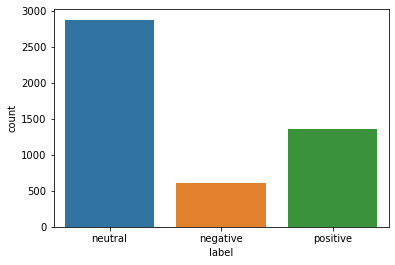

In [24]:
sns.countplot(data_set['label'])

In [25]:
data_set['data_len']=data_set['review'].apply(len)
data_set.tail(10)

,label,review,data_len
4836,negative,"Operating profits in the half were 0.8 m , down from 0.9 m as Glisten invested in the brand and the management team .",119
4837,negative,"Sales in Finland decreased by 2.0 % , and international sales decreased by 9.3 % in terms of euros , and by 15.1 % in terms of local currencies .",145
4838,negative,The company said that its comparable operating profit for the January-June period fell short of last year 's corresponding performance .,136
4839,negative,"Operating result for the 12-month period decreased from the profit of EUR0 .4 m while turnover decreased from EUR5 .6 m , as compared to 2004 .",143
4840,negative,"HELSINKI Thomson Financial - Shares in Cargotec fell sharply in early afternoon trade after the cargo handling group posted a surprise drop in April-June profits , which overshadowed the large number of new orders received during the three months .",248
4841,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .,144
4842,neutral,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres .",148
4843,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .",108
4844,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn .",226
4845,negative,"Sales in Finland decreased by 10.5 % in January , while sales outside Finland dropped by 17 % .",95


<AxesSubplot:ylabel='Frequency'>

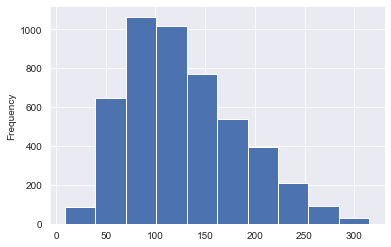

In [26]:
sns.set({'figure.facecolor':'red'})
data_set['data_len'].plot(kind='hist')

In [27]:
data_set.data_len.describe()

count    4846.000000
mean     128.132068 
std      56.526180  
min      9.000000   
25%      84.000000  
50%      119.000000 
75%      163.000000 
max      315.000000 
Name: data_len, dtype: float64

### Data Preprocessing

Text data is available to a great extent which is used to analyze and solve business problems. But before using the data for analysis or prediction, processing the data is important.

To prepare the text data for the model building we perform text preprocessing. It is the very first step of NLP projects. Some of the preprocessing steps are:

-Removing punctuations like . , ! $( ) * % @

-Removing URLs

-Removing Stop words

-Lower casing

-Tokenization

-Stemming

-Lemmatization

We need to use the required steps based on our dataset.

In [28]:
#Steps to clean the data
data_set.isnull().sum()

label       0
review      0
data_len    0
dtype: int64

In [29]:
#converting cat to numerical data

#data_set['label_calss']=data_set['label_class'].map({'neutral':0, 'negative':1, 'positive':2})

def cat_to_num(labels):
    if labels == 'neutral':
        return 0
    elif labels == 'negative':
        return 1
    else:
        return 2

data_set['label_class'] = data_set['label'].apply(cat_to_num)
data_set.head()

,label,review,data_len,label_class
0,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",127,0
1,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",190,0
2,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",228,1
3,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,206,2
4,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",203,2


In [30]:
corpus=[]
for i in range(len(data_set)):
    #removing the all the characters except the alphabets
    review = re.sub('[^a-zA-Z]' , ' ' , data_set['review'][i])
    #lowering the text
    review = review.lower()
    #spliting the text into lists
    review = review.split()
    #stemmimg
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [31]:
corpus

['accord gran compani plan move product russia although compani grow',
 'technopoli plan develop stage area less squar meter order host compani work comput technolog telecommun statement said',
 'intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report',
 'new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit',
 'accord compani updat strategi year baswar target long term net sale growth rang oper profit margin net sale',
 'financ aspocomp growth aspocomp aggress pursu growth strategi increasingli focus technolog demand hdi print circuit board pcb',
 'last quarter componenta net sale doubl eur eur period year earlier move zero pre tax profit pre tax loss eur',
 'third quarter net sale increas eur mn oper profit eur mn',
 'oper profit rose eur mn eur mn correspond period repres net sale',
 'oper profit total eur mn e

In [32]:
data_set.label.head()

0    neutral 
1    neutral 
2    negative
3    positive
4    positive
Name: label, dtype: object

In [33]:
data_set.review.head()

0    According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .                                                                                                     
1    Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .                                      
2    The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .
3    With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .                      
4    According to the company 's updated strategy for the years 

In [34]:
data_set.review.shape

(4846,)

In [35]:
data_set.label_class.shape

(4846,)

In [36]:
#model building converting to vectors
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=100,ngram_range=(1,4))

X=vectorizer.fit_transform(corpus).toarray()
#y=data_set.iloc[: , -1].values
y=data_set.label_class

from sklearn.feature_extraction.text import TfidfTransformer
# tf=TfidfTransformer()

In [37]:
X_train, X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state = 0)
X_train.shape, y_train.shape

((3876, 100), (3876,))

In [38]:
vectorizer.get_feature_names()[:20]

['accord',
 'agreement',
 'also',
 'announc',
 'area',
 'bank',
 'base',
 'board',
 'build',
 'busi',
 'capit',
 'compani',
 'compar',
 'construct',
 'contract',
 'corpor',
 'correspond',
 'correspond period',
 'custom',
 'develop']

0.6938144329896907


array([0], dtype=int64)

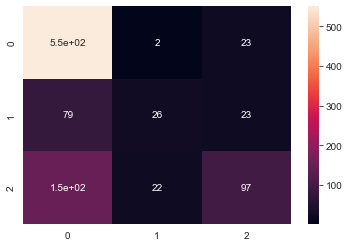

In [39]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm  = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)
print(accuracy_score(y_test , y_pred))
X_pred = np.array(['The food was delicious'])
X_pred = vectorizer.transform(X_pred).toarray()
classifier.predict(X_pred)

In [40]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.71      0.96      0.81       575
           1       0.52      0.20      0.29       128
           2       0.68      0.36      0.47       267

    accuracy                           0.69       970
   macro avg       0.64      0.51      0.53       970
weighted avg       0.67      0.69      0.65       970



In [41]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['pred neutral','pred neg','pred pos'],index=['act neutral','act neg','act pos'])

,pred neutral,pred neg,pred pos
act neutral,550,2,23
act neg,79,26,23
act pos,148,22,97


In [42]:
#building the models and predicting the acuracy

In [43]:
models= {MultinomialNB():'MNB',
GaussianNB():'GNB',
DecisionTreeClassifier():'DTC',
RandomForestClassifier():'RTC'}

for i in models.keys():
    i.fit(X_train,y_train)

In [44]:
for model, model_name in models.items():
    print(f'accuracy_score {model_name}',model.score(X_test,y_test)*100,'%')

accuracy_score MNB 63.298969072164944 %
accuracy_score GNB 62.577319587628864 %
accuracy_score DTC 61.03092783505155 %
accuracy_score RTC 66.28865979381443 %


In [48]:
#saving the model data in pickle file
import pickle
pickle.dump(classifier,open(r'C:\Users\Dell\Desktop\Sentimental Analysis\data\model.pkl','wb'))